# THE SPARK FOUNDATION

# #GRIP AUG21

## #6Task  (Data Science & Business Analytics) 

## Objective- Create the Decision Tree classifier and visualize it graphically.

### Author- Arbaaz Ali Jafri

#### Dataset URL: https://bit.ly/3kXTdox

In [8]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

### 1. Importing Dataset

In [9]:
url="https://bit.ly/3kXTdox"
df = pd.read_csv('Iris.csv')

In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 2. Exploratory Data Analysis

#### 2.1 Checking shape of data

In [11]:
df.shape

(150, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### 2.2 Removing 'ID' column as it of no use

In [13]:
df=df.drop(['Id'],axis=1)

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 2.3 Checking Dependent Variable

In [15]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

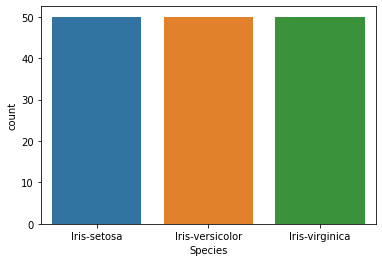

In [16]:
sns.countplot(df['Species'])
plt.show()

** All the classes have equal count **

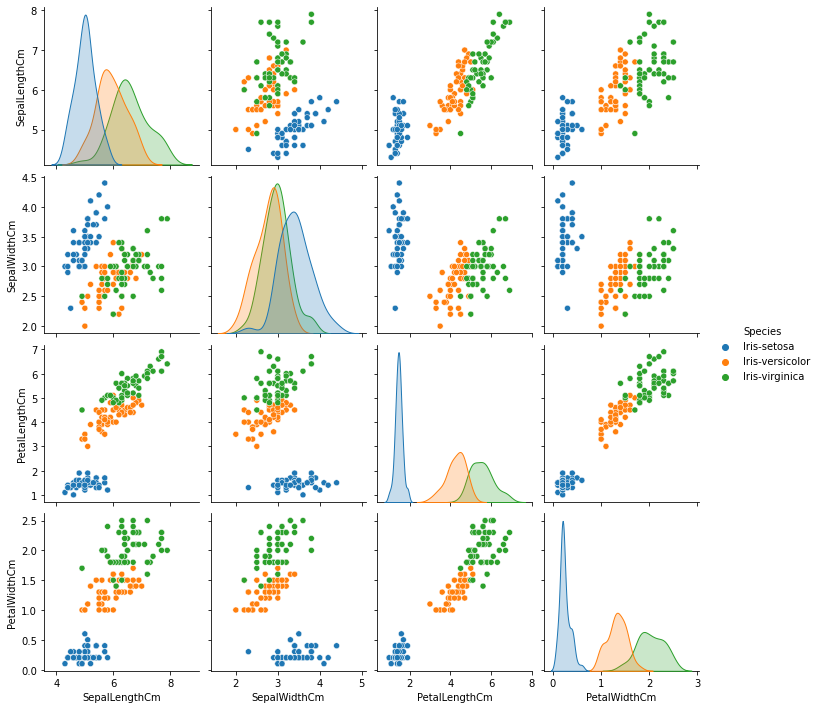

In [17]:
sns.pairplot(df,hue='Species')
plt.show()

From the above plots we can that that data points are overlapping.

#### 2.4 Encoding Dependent variable

##### Encoding: 
##### Iris-versicolor:- 0
##### Iris-virginica:- 1
##### Iris-setosa:- 2 

In [18]:
df['Species']=df['Species'].map({'Iris-versicolor':0,'Iris-virginica':1,'Iris-setosa':2})

#### 2.4 Checking for null values and outliers

In [19]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

** No null values found **

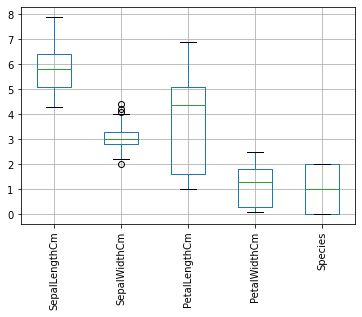

In [20]:
df.plot(kind='box')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

In [21]:
## Very few ouliers are present

### 3. Preparing the Data

#### 3.1 Dividing data

In [22]:
X=df.iloc[:,:4]
y=df.iloc[:,[4]]

In [23]:
X.head(),y.head()

(   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0            5.1           3.5            1.4           0.2
 1            4.9           3.0            1.4           0.2
 2            4.7           3.2            1.3           0.2
 3            4.6           3.1            1.5           0.2
 4            5.0           3.6            1.4           0.2,
    Species
 0        2
 1        2
 2        2
 3        2
 4        2)

#### 3.2 Splitting data into train and test dataset

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105, 1), (45, 1))

### 4. Model Building

#### 4.1 Creating Base model

In [26]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

#### 4.2 Visualising Decision Tree

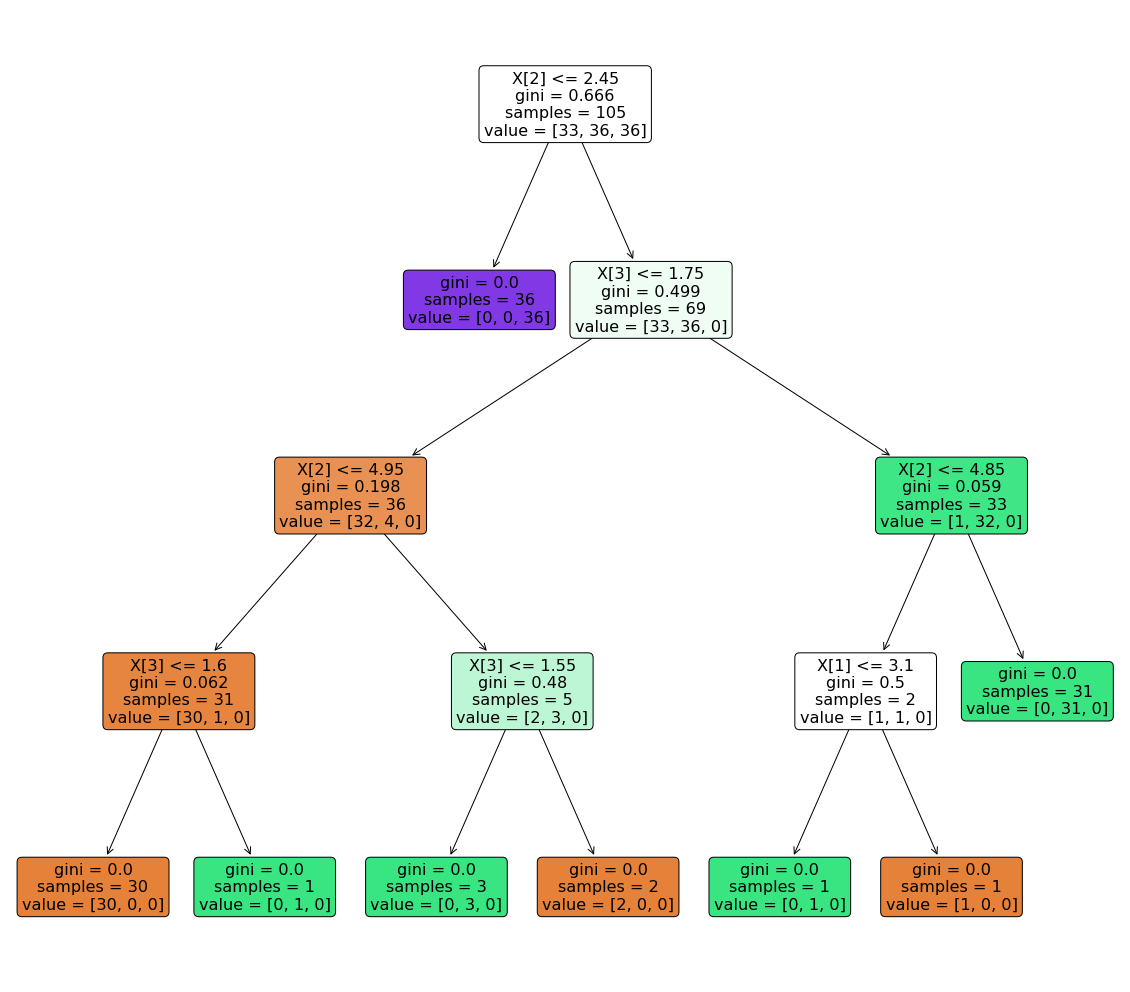

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,18))
plot_tree(dtree,filled=True,rounded=True)
plt.show()

#### 4.3 Evaluation 

In [28]:
y_pred_train=dtree.predict(X_train)
y_pred_test=dtree.predict(X_test)


In [29]:
print('Accuracy for Train:',round(accuracy_score(y_train,y_pred_train)*100,2))
print('Accuracy for Test:',round(accuracy_score(y_test,y_pred_test)*100,2))

Accuracy for Train: 100.0
Accuracy for Test: 97.78


** We can see from the scores that model is overfitting **

In [30]:
## Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

cm=confusion_matrix(y_test,y_pred_test)

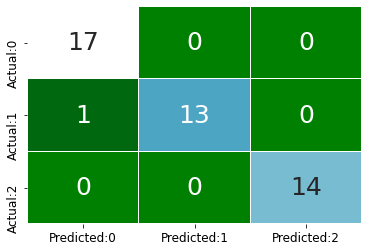

In [31]:
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])

sns.heatmap(conf_matrix, annot = True, cmap = 'ocean', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [32]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



** Model has good accuracy but as it Overfitting model it is not reliable with any new test data, This needs Tuning. **

### 5. Parameter Tuning

#### 5.1 Using GridSearchCV for selecting Best parameters

In [33]:
from sklearn.model_selection import GridSearchCV

para={'criterion':['gini','entropy'],'max_depth': range(2,11),'min_samples_split': range(1,5),'min_samples_leaf':[1,2,3,4]}

dt=DecisionTreeClassifier()
dt_grid=GridSearchCV(dt,para,cv=5,scoring='accuracy')
dt_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 11),
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': range(1, 5)},
             scoring='accuracy')

In [34]:
## Checking best parameters

dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### 6. Final Model

#### 6.1 Building New model with best parameters.

In [35]:
dt_new=DecisionTreeClassifier(criterion='gini',max_depth=2, min_samples_leaf= 1, min_samples_split= 2)
dt_new.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [36]:
y_pred_train_new=dt_new.predict(X_train)
y_pred_test_new=dt_new.predict(X_test)

#### 6.2 Model Evaluation

In [42]:
print('Accuracy for Train:',round(accuracy_score(y_train,y_pred_train_new)*100))
print('Accuracy for Test:',round(accuracy_score(y_test,y_pred_test_new)*100))

Accuracy for Train: 95
Accuracy for Test: 98


#### 6.3 Confusion Matrix

In [38]:
cm_new=confusion_matrix(y_test,y_pred_test_new)
cm_new

array([[17,  0,  0],
       [ 1, 13,  0],
       [ 0,  0, 14]], dtype=int64)

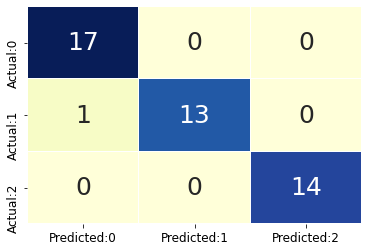

In [39]:
conf_matrix = pd.DataFrame(data = cm_new,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])

sns.heatmap(conf_matrix, annot = True, cmap = 'YlGnBu', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

#### 6.4 Classification Report

In [40]:
print(classification_report(y_test,y_pred_test_new))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Model has an accuracy of 98%.

#### 6.5 Visualising Tree

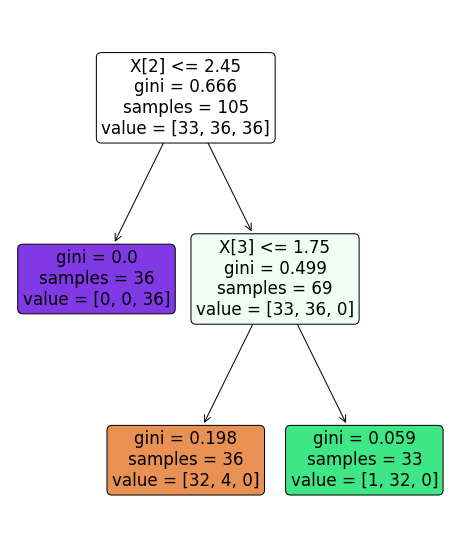

In [41]:
plt.figure(figsize=(8,10))
plot_tree(dt_new,filled=True,rounded=True)
plt.show()

#### If we feed any new data to this classifier, it would be able to predict the right class accordingly. 